In [9]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import os
import time

In [10]:
def is_independent_set(graph, subset):
    for u, v in itertools.combinations(subset, 2):
        if graph.has_edge(u, v):
            return False
    return True

In [11]:
def is_dominating_set(graph, subset):
    dominating_nodes = set(subset)
    for node in subset:
        dominating_nodes.update(graph.neighbors(node))
    dominating_nodes.update(subset)
    return len(dominating_nodes) == len(graph.nodes)

In [12]:
def brute_force_mids(graph):
    nodes = list(graph.nodes)
    n = len(nodes)
    min_set = None
    iteration_count = 0
    
    for r in range(1, n + 1):
        for subset in itertools.combinations(nodes, r):
            iteration_count += 1
            if is_independent_set(graph, subset) and is_dominating_set(graph, subset):
                if min_set is None or len(subset) < len(min_set):
                    min_set = subset
                    
    return min_set, iteration_count

In [13]:
def draw_graph(graph, min_set):
    pos = nx.spring_layout(graph)  
    plt.figure(figsize=(8, 6)) 
    
    nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5)
    
    node_color = 'lightblue'
    node_color = [('red' if node in min_set else 'lightblue') for node in graph.nodes]
    
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, node_size=500)
    
    nx.draw_networkx_labels(graph, pos)
    
    plt.title("Graf sa Minimalnim Nezavisnim Dominirajućim Skupom")
    plt.show()

Minimum Independent Dominating Set: ('1', '3', '24', '27')


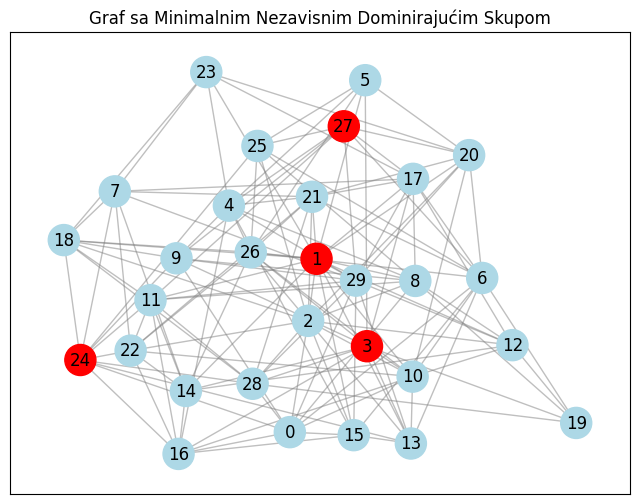

In [14]:
G = nx.read_gml("tests/test_30_0.3.in")


mids = brute_force_mids(G)
print("Minimum Independent Dominating Set:", mids)

draw_graph(G, min_set=mids)

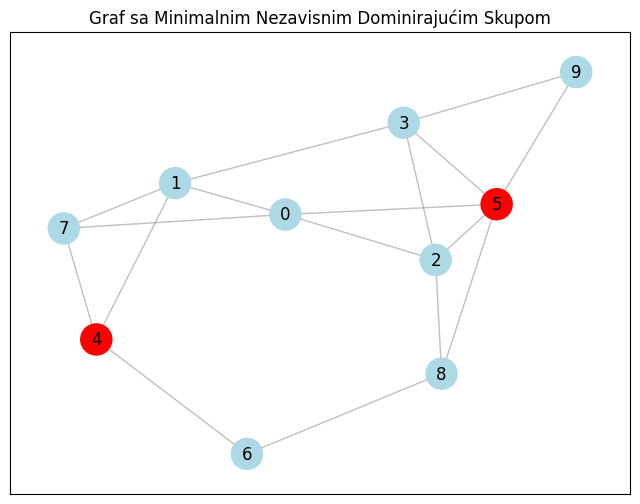

Processed graph test_10_0.3.in and saved results.


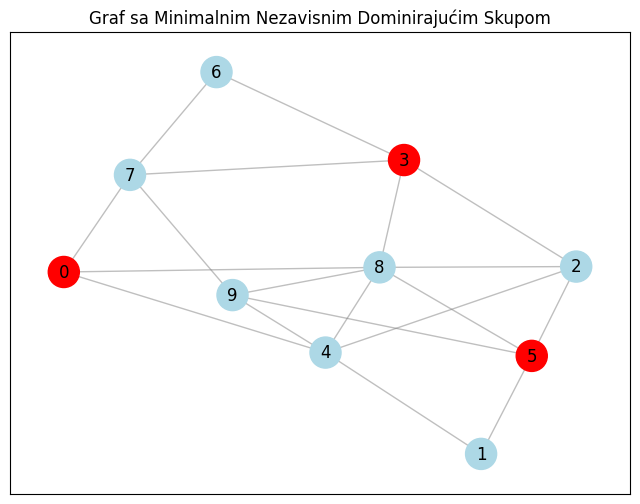

Processed graph test_10_0.5.in and saved results.


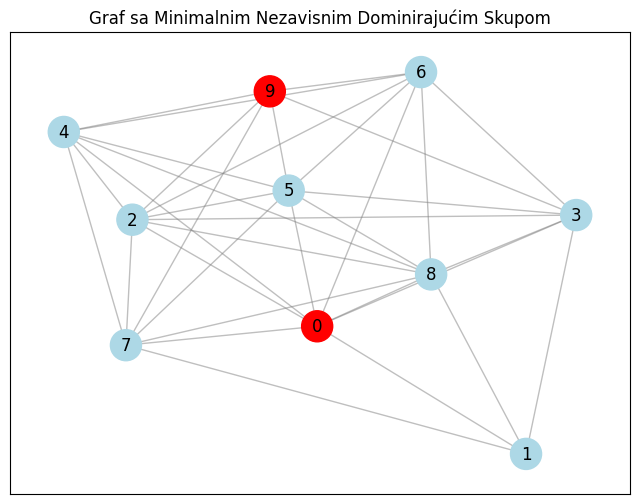

Processed graph test_10_0.7.in and saved results.


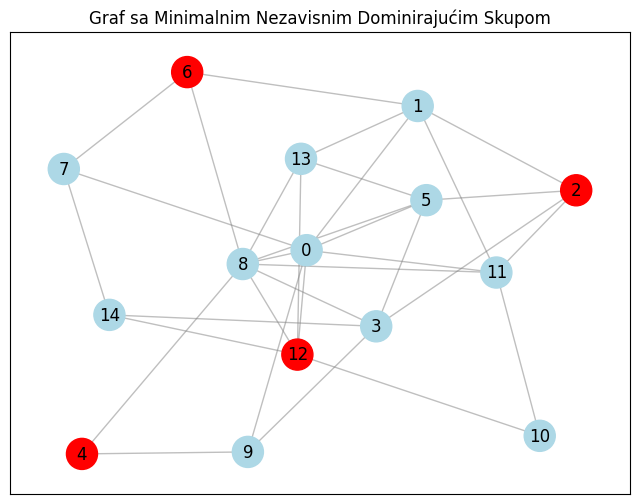

Processed graph test_15_0.3.in and saved results.


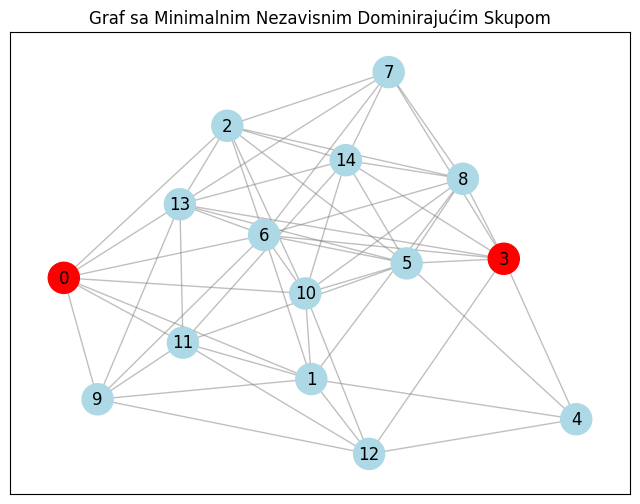

Processed graph test_15_0.5.in and saved results.


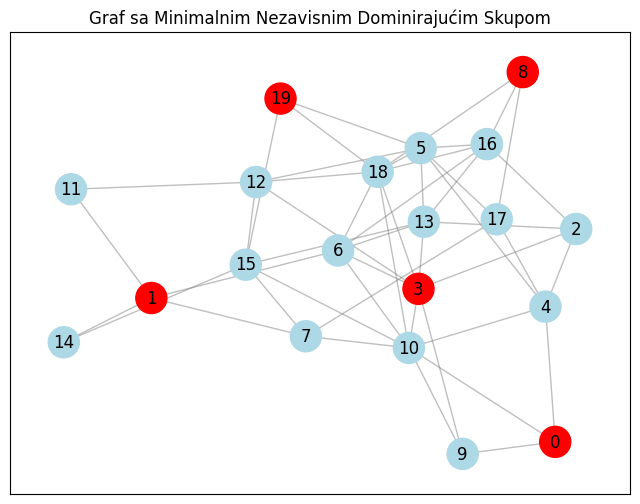

Processed graph test_20_0.3.in and saved results.


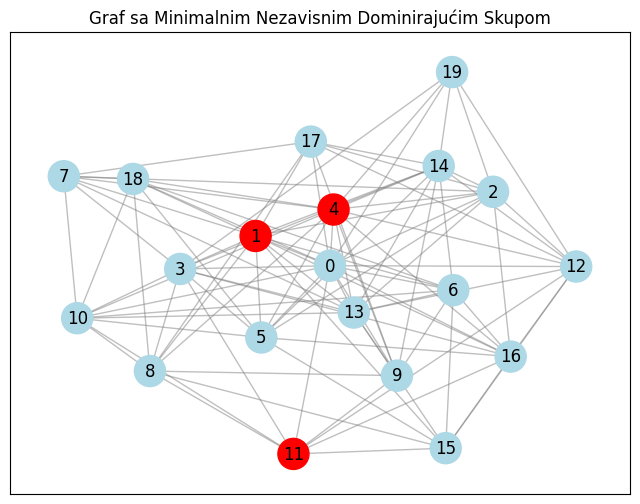

Processed graph test_20_0.5.in and saved results.


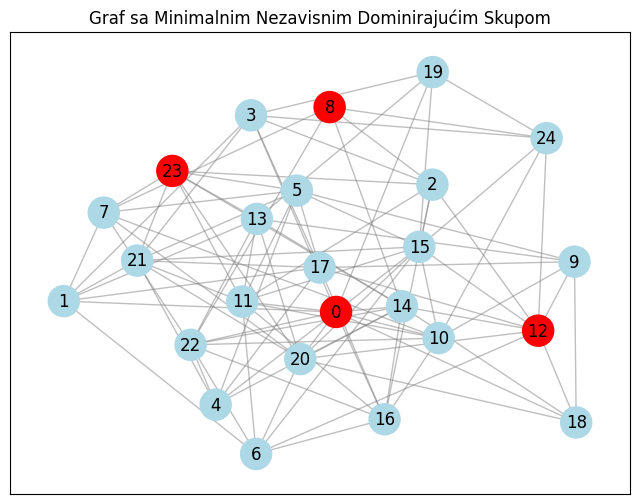

Processed graph test_25_0.3.in and saved results.


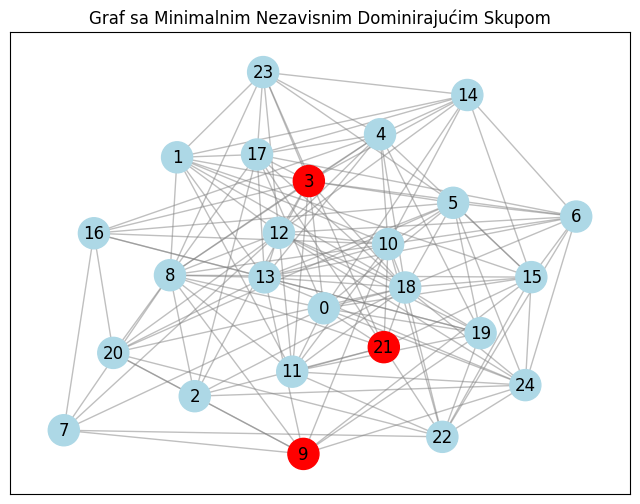

Processed graph test_25_0.5.in and saved results.


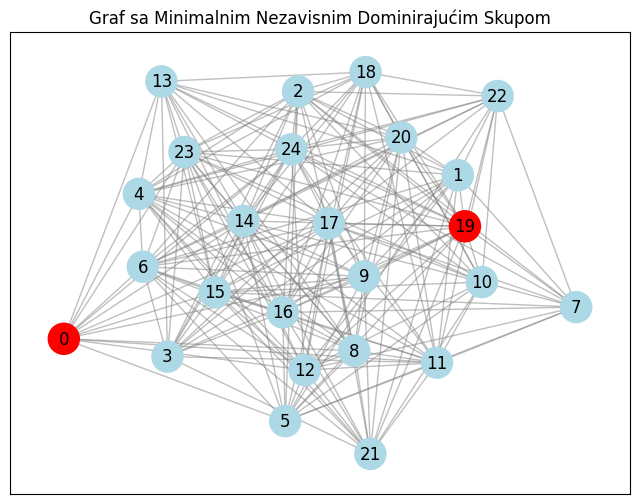

Processed graph test_25_0.7.in and saved results.
Processed graph test_30_0.3.in and saved results.
Processed graph test_30_0.5.in and saved results.
Processed graph test_35_0.3.in and saved results.
Processed graph test_35_0.5.in and saved results.
Processed graph test_40_0.3.in and saved results.
Processed graph test_40_0.5.in and saved results.
Processed graph test_40_0.7.in and saved results.


In [15]:
def run_brute_force_on_tests(directory="tests/", results_dir="results/", output_file="bruteForceResults.txt", max_nodes=25):
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    output_path = os.path.join(results_dir, output_file)
    
    with open(output_path, 'w') as f_out:
        for filename in os.listdir(directory):
            if filename.endswith(".in"): 
                graph_path = os.path.join(directory, filename)
                
                graph = nx.read_gml(graph_path)
                
                start_time = time.time()
                
                if len(graph.nodes) > max_nodes:
                    result_message = "Graph too large for brute force."
                    best_set = []
                    num_iterations = 0
                else:
                    mids, num_iterations = brute_force_mids(graph)  
                    best_set = mids
                    result_message = "Minimum independent dominating set found." if best_set else "No valid solution found."
                
                elapsed_time = time.time() - start_time
                
                num_nodes_in_set = len(best_set)
                
                f_out.write(f"Test Name: {filename}\n")
                f_out.write(f"Result: {result_message}\n")
                f_out.write(f"Number of nodes: {num_nodes_in_set}\n")
                f_out.write(f"Number of iterations: {num_iterations}\n")
                f_out.write(f"Time taken (seconds): {elapsed_time}\n")
                f_out.write("\n")  

                if best_set:
                    draw_graph(graph, best_set)

                print(f"Processed graph {filename} and saved results.")

def brute_force_mids(graph):
    nodes = list(graph.nodes())
    min_set = None
    min_set_size = float('inf')
    iteration_count = 0

    for r in range(1, len(nodes) + 1):
        for subset in itertools.combinations(nodes, r):
            iteration_count += 1
            if is_independent_set(graph, subset) and is_dominating_set(graph, subset):
                if len(subset) < min_set_size:
                    min_set_size = len(subset)
                    min_set = subset
    
    return min_set, iteration_count

run_brute_force_on_tests(directory="tests/", results_dir="results/", output_file="bruteForceResults.txt")
